In [1]:
from load_vae import *
import pandas as pd

from Bio import SeqIO
from Bio.SeqRecord import SeqRecord

In [5]:
df = pd.read_csv("data/uniref-cropped-TrpB.csv")
df

,1,sequence,cluster_80,cluster80size,weighted_prob,Split
0,11154,MKGYFGPYGGQYVPEILMGALEELEAAYEGIMNAEAFSDAWREITS...,11154,1,1.000000,train
1,11157,MKGYFGPYGGQYVPEILMGALEELEAAYEGIMKDESFWKEAKEKLK...,11157,1,1.000000,train
2,11161,MKGYFGPYGGQYVPEILMGALEELEAAYEGIMKDESFWKEFNDLLR...,11161,2,0.590616,train
3,143502,MKGYFGPYGGQYVPEILMGALEELEAAYEGIMKDESFWKEFNDLLR...,11161,2,0.590616,train
4,11164,MKGYFGPYGGQYVPEILMGALEELEAAYEGIMKDESFWKEFNDLLR...,11164,10,0.302793,train
...,...,...,...,...,...,...
173080,69664,MKGYFGPYGGQYVPEILMGALEELEAAYEGIMKDESFWKEFNDLLR...,150740,7,0.339454,train
173081,81942,MKGYFGPYGGQYVPEILMGALEELEAAYEGIMKDESFWKEFNDLLR...,150740,7,0.339454,train
173082,86757,MKGYFGPYGGQYVPEILMGALEELEAAYEGIMKDESFWKEFNDLLR...,150740,7,0.339454,train
173083,150742,MKGYFGPYGGQYVPETLGQPEILLKMAYAATLQDCLFWKNAQERLK...,150742,1,1.000000,train


In [9]:
vae, dataobj  = load_vae(
    "/disk1/jyang4/repos/APEXGo/generation/saved_models/smart-lion-4/smart-lion-4_model_state_epoch_103.pkl",
    dim=256, # dim//2
    max_string_length=400,
)

/disk1/jyang4/repos/APEXGo/generation/load_vae.py:32: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(path_to_vae_statedict)


In [9]:
df = pd.read_csv("/disk1/jyang4/repos/APEXGo/generation/data/uniref-cropped.csv")
#select 100 rows randomly
df = df.sample(n=100, random_state=42)
#save sequences to csv
df.to_csv("/disk1/jyang4/repos/APEXGo/generation/data/init_seqs.csv", index=False)

In [10]:
df = pd.read_csv("/disk1/jyang4/repos/APEXGo/generation/data/uniref-cropped.csv")
xs_batch = list(df["sequence"][:1000].values)
z, vae_loss = vae_forward(xs_batch, dataobj, vae)

decoded_seqs = vae_decode(z, vae, dataobj)

OutOfMemoryError: CUDA out of memory. Tried to allocate 2.29 GiB. GPU 0 has a total capacity of 79.10 GiB of which 2.25 GiB is free. Process 2868096 has 29.59 GiB memory in use. Including non-PyTorch memory, this process has 47.24 GiB memory in use. Of the allocated memory 43.96 GiB is allocated by PyTorch, and 2.71 GiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [4]:
xs_batch

['MKGYFGPYGGQYVPEILMGALEELEAAYEGIMNAEAFSDAWREITSWPGYAPTPLRRLDGLAAAAGGRLWYKDESGRGLGSFKALGGAYAVLRLSRHGHAGTVTCATDGNHGRSVAWGAQQFGCRCIIYIHATVSIRQEARRDAIARYGAEVIRVASGSGTYDDAVRQAARDAEAELQGRFVVSTSYPGYTEVPRDVMQGYTVMVEEALRQLPAKEDEPPTHIFIQGGVGGLAAAVCAHFWRTRPWLVVVEPDQAACLTGKHFESARAGEPTVVHGGKTFVLQDDWGQVQVSHSVSAGLDYSGVGPEHAYWRETGKVLYDAVTDEEALDAFIELSRLEGIIPALESSHALAYLKKINIKGKVVVVNLSGRGDKDLESVLNHPYVRERIR',
 'MKGYFGPYGGQYVPEILMGALEELEAAYEGIMKDESFWKEAKEKLKNIIGNETELDYSRTFSELSGNQIYLKPENLQRTGSFKIRGAYNKLSNLTAEEKERGVVAASAGNHAQGVALAASQLGIKSTIIMPKGAPIRQKAKVKATQEYGAEVILSKSGSDTYKDAAHEKEEEYAQNLQKTGYVFATIIPAFNDTDIVAGFQGTIGLEILEELSDKEGRLVEVIIAPIGGGGLISGIAIAIKNPNVEIIGVEAREAGLETASMKASLRRRRPVVLETVNTIALQDDWGQVQVSHSVSDGIAVKRPGDLTAYKITSKYVDYVAVDEEEIAHSISLLAERSKLIVEGAGATGLAAVDKISLHGKKIAIVLSGRGNIDLDMISTHPYVRERIR',
 'MKGYFGPYGGQYVPEILMGALEELEAAYEGIMKDESFWKEFNDLLRDYAGFPTPLMSSPILNEIAGRRILLKPECLQHTGSFKYRGAFAAISKLSKNALANGVVSYSSGNHAQGIALAAQQHNCTSMIVMPEEDAIRPKLKINNTKRLGSEIKLYNRTERESRENITLQLRDWLAKERDTYYVFLTIIRPYDEPMVIAGFQGTIGLEIAR

In [5]:
decoded_seqs

['GYFGPYGGGAYVPEIELMGALEEYEAAYEGIMRDYRWHRALDSTLSGYAGSPTPLARADGLGALAGRAIYLKDERGGPLGSFKAGVACHFILDALRERARATVCTATDGNHGRSVAWGAQQYGHRAVIYIHRTVSIRQPQAAEAIAAFGAEVRRVAGGSRNYDDSVRLAMRQAEAHGQTWVVISDTEPGYESTPDRVMQGYTCIFAELFREGPAKEGRLPTHVFVQGGVGGLAAAVAAHLWHPQVQVIVVEPDEAACETGKLADSLLKGKIGYLHGSKTFVLQDDWGQVQVSHSVSAGLDYSGVGPEHAYWRETGKVLYDAVTDEEALDAFIELSRLEGIIPALESSHALAYLKKINIKGKVVVVNLSGRGDKDLESVLNHPYVRERIR',
 'GYFFGPYGGQYVPEILMMKALEELEAAYEGIMKDESFWKEAEELIGKNIVRKTPLENSTNYSRESGNDIFLKAENLQITGSFKIRGAYYKLSKLTQEQRAKGVVASSAGNHAQGVALAAKELDIKATIVMPKKSPIRQQAKIGATKGYGAEIVLAKSEGDSYDEAYNKAERLLTEKQGTTYYVTATFIHPFEDEHIIAGFQGTIGLEIMEEHQDLEGRLPSAIVVPIGGGGLISGIAIAILNSNVKIIGVEARAAPNVTGKHEASLRNKRSVSLDGSKTIVLQDDWGQVQVSLTIADGIAVRKPGENTYSVIAEYVDEIVTVTDDEIVDAIRWLIERNKLVAEGAGAASLAACNEIENQNQKVVALLSGRGNIDLESVLNHPYVRERIR',
 'MKGYFGPYGGQYVPEILMGALEELEAAYEGIMKDESFWKEFNDLLRDYAGLPSPLISSPFMNELTGKRILIKCECLQHTGAFKFRGASNAISALTAAERRPGVVAYSSGNHAQGLALAAQQHKTPSTIIMPEEDAIRPPSKINNTKAYGAEVLLYNRYSRMTREELDKINREWKTNLQRRYYVFLTLIRPFNDPWIIAGFQGTIGNEIKR

In [ ]:
#save the list to fasta

records = [SeqRecord(seq=seq, id=str(i), description="") for i, seq in enumerate(decoded_seqs)]
SeqIO.write(records, "/disk1/jyang4/repos/APEXGo/generation/data/decoded_sequences.fasta", "fasta")

In [6]:
#check hamming distance between xs_batch and decoded seqs
def hamming_distance(seq1, seq2):
    return sum(el1 != el2 for el1, el2 in zip(seq1, seq2))

hamming_distances = [hamming_distance(x, d) for x, d in zip(xs_batch, decoded_seqs)]    

In [7]:
hamming_distances

[132, 167, 86, 100, 122, 104, 107, 105, 106, 115]

In [8]:
hamming_distance(decoded_seqs[0], decoded_seqs[1])

253

In [4]:
#load from fasta
fasta_path = "/disk1/jyang4/repos/APEXGo/generation/data/generated.fasta"
decoded_seqs_from_fasta = [str(record.seq) for record in SeqIO.parse(fasta_path, "fasta")]
#check hamming distance between xs_batch and decoded seqs from fasta
decoded_seqs_from_fasta

#check for special characters not in amino acid alphabet
import re
def contains_special_characters(seq):
    return bool(re.search(r'[^ACDEFGHIKLMNPQRSTVWY]', seq))   

special_characters = [contains_special_characters(seq) for seq in decoded_seqs_from_fasta]
sum(special_characters)

7

In [5]:
perplexity_df = pd.read_csv("/disk1/jyang4/repos/APEXGo/generation/data/perplexity.csv")
perplexity_df

,sequence,perplexity,prior,task,finetuned,fitness
0,GYFYGPYGGGQYVPEILMGALEELEAAYEGIMADESFWKAYASRLD...,8.311823,vae,unconstrained,False,0.000000
1,GYFFGPYGGQYVPEILLMGALEELEAAYEGIMKDESFWKEFNEKIN...,10.152599,vae,unconstrained,False,0.000000
2,MKGYFGPYGGQYVPEILMGALEELEAAYEGIMKDESFWKEFNDLLR...,7.204418,vae,unconstrained,False,0.057581
3,PGYFGPYGGQYVPEILLMGALEELEAAYEGIMKDESFWKEFNDLLR...,8.915025,vae,unconstrained,False,0.076630
4,PMKGYFGPYGQYVPEILMGALEELEAAYEGIMKDESFWKEFNDLLR...,7.465867,vae,unconstrained,False,0.286645
...,...,...,...,...,...,...
995,MGYFGPYGGGQYVPEILMGALEELEAAYEGIMKDESFWKEFNDVLA...,7.204696,vae,unconstrained,False,0.314496
996,MKGYFGPYGGQYVPEILMGALEELEAAYEGIMKDESFWKEFNDLLR...,7.042418,vae,unconstrained,False,0.296542
997,MKGYFGPYGGQYVPEILMGALEELEAAYEGIMKDESFWKEFEDSIS...,7.044582,vae,unconstrained,False,0.380297
998,MGYFGPYGGGQYVPEILMGALEELEAAYEGIMKDESFWKEFADSVT...,8.968027,vae,unconstrained,False,0.000000


<Axes: >

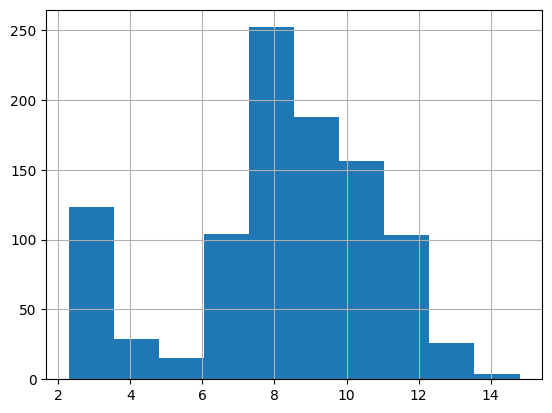

In [6]:
perplexity_df["perplexity"].hist()

0.22671081782109104


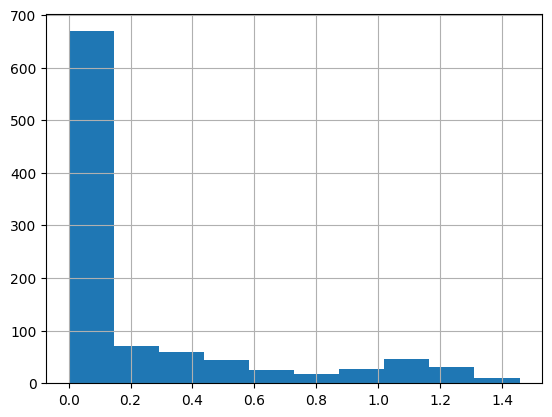

In [8]:
perplexity_df["fitness"].hist()
print(perplexity_df["fitness"].mean())